# Proyecto primer bimestre - Villacres Sergio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path='C://Users/Sergio/Documents/GitHub/py-villacres-lizano-sergio-wladimir/Proyectos/Primer Bimestre/data/master.csv'

In [5]:
lista = pd.read_csv(
        path
        )

lista

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


Text(0,0.5,'Suicidios')

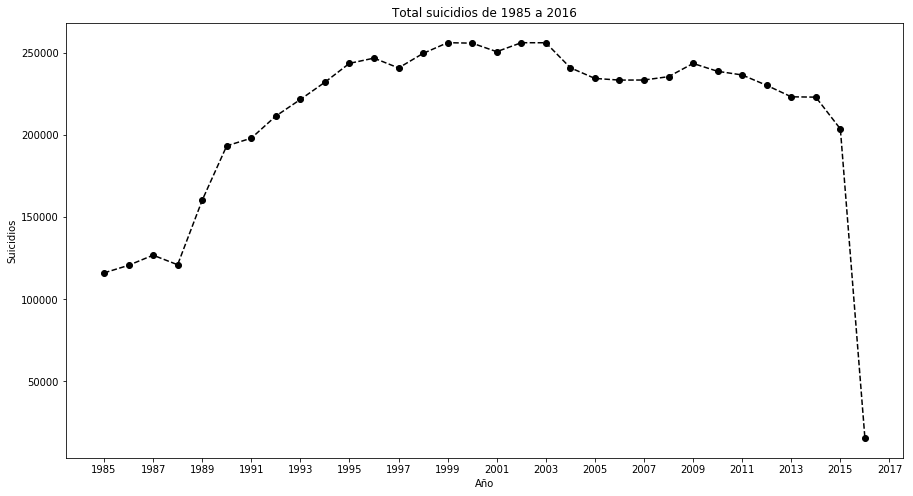

In [6]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(lista.groupby(['year']).suicides_no.sum(),'ko--')
tick = ax.set_xticks(range(1985,2018,2))
ax.set_title('Total suicidios de 1985 a 2016')
ax.set_xlabel('Año')
ax.set_ylabel('Suicidios')

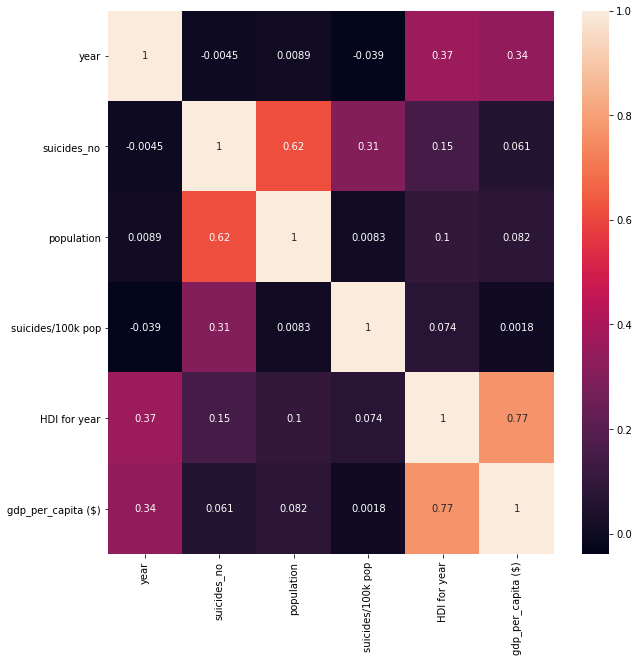

In [15]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(lista.corr(),annot=True)
plt.show()

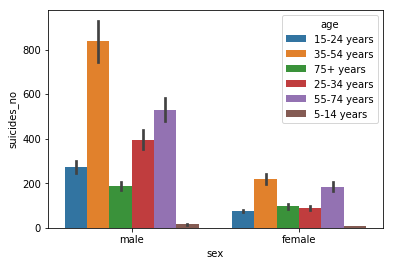

In [8]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=lista)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

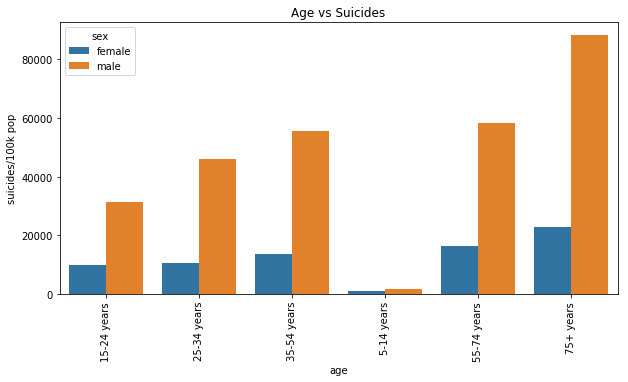

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = "suicides/100k pop", hue = "sex",data = lista.groupby(["age","sex"]).sum().reset_index()).set_title("Age vs Suicides")
plt.xticks(rotation = 90)

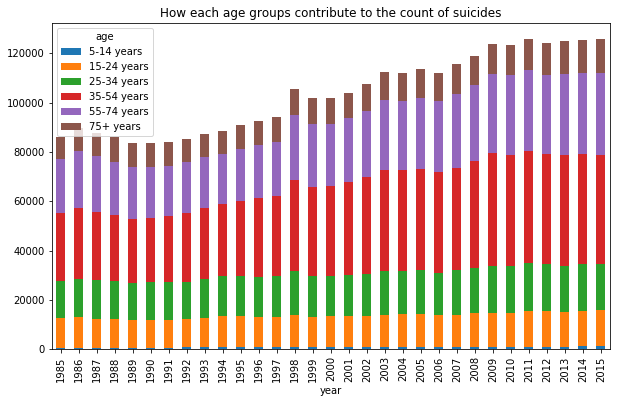

In [10]:
def count_year(group):
    return len(group.year.unique())
country_o = lista.groupby('country').apply(count_year).sort_values(ascending = False)
country_o.name = 'occurances of country'
nmaster = lista[~ (lista.year == 2016)].drop(['HDI for year','country-year','suicides/100k pop'],axis = 1)
coun_year = lista.groupby('country-year').population.sum()
ncountry_o = nmaster.groupby('country').apply(count_year).sort_values(ascending = False)
ncountry_o[country_o >= 30] 
pmaster = nmaster[nmaster.country.isin(ncountry_o[country_o >= 31].index)]
age_group = pd.pivot_table(pmaster,index=['year'],values='suicides_no',columns=['age'],aggfunc=np.sum)
sui_age=age_group[['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years']]
sui_age.plot(kind = 'bar',figsize=(10,6),stacked=True,title='How each age groups contribute to the count of suicides')

In [11]:
suicide_sum = lista.groupby('country', sort=False)["suicides_no"].sum().reset_index(name ='total_suicides')
suicide_sum = suicide_sum.sort_values(by="total_suicides", ascending=False)

suicide_sum.head()


,country,total_suicides
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


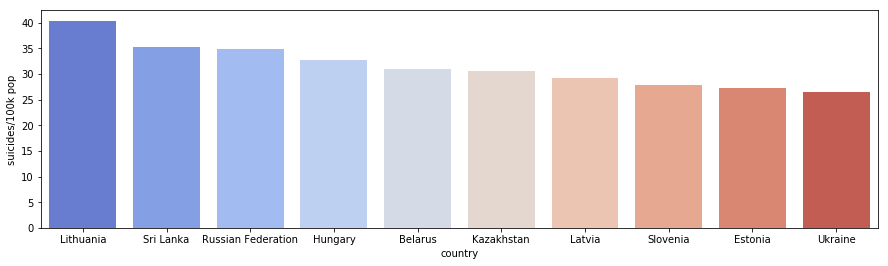

In [12]:
data_suicide_mean = lista['suicides/100k pop'].groupby(lista.country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10),palette='coolwarm')

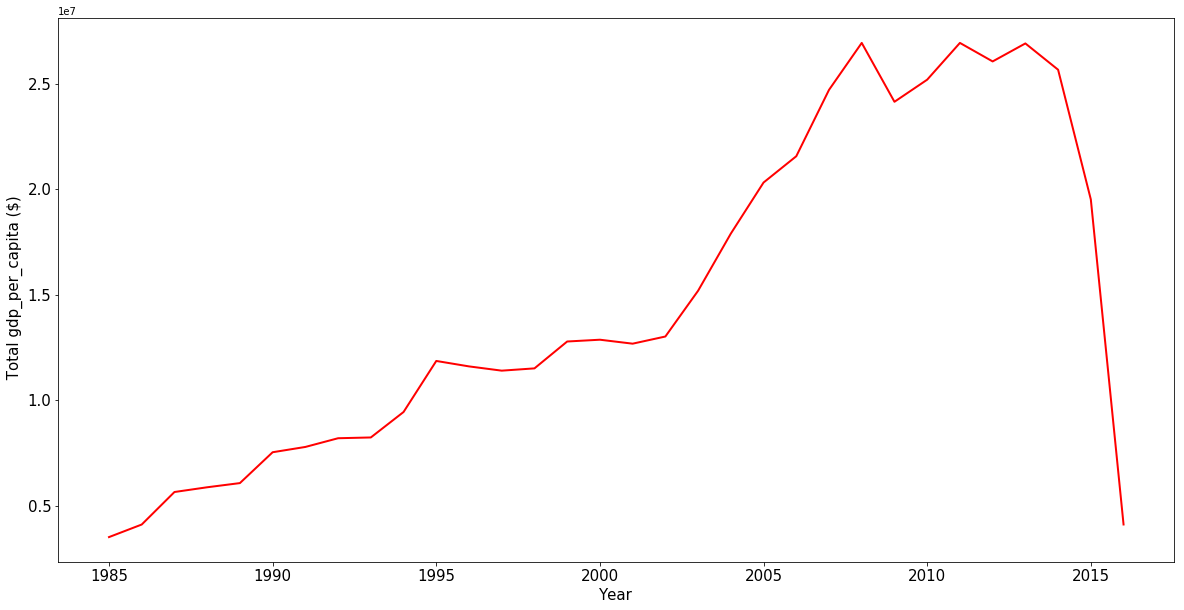

In [13]:
data_gdp = (lista['gdp_per_capita ($)'].groupby(lista.year)).sum()
data_gdp.plot(figsize=(20,10), linewidth=2, fontsize=15,color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel(' Total gdp_per_capita ($)',fontsize=15)
plt.show()

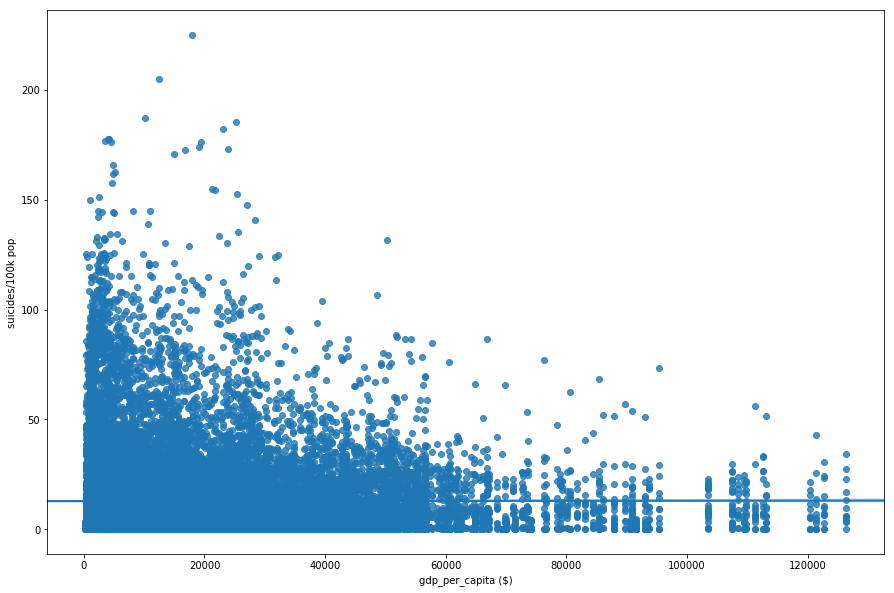

In [14]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.regplot(x='gdp_per_capita ($)', y='suicides/100k pop',data=lista)
plt.show()

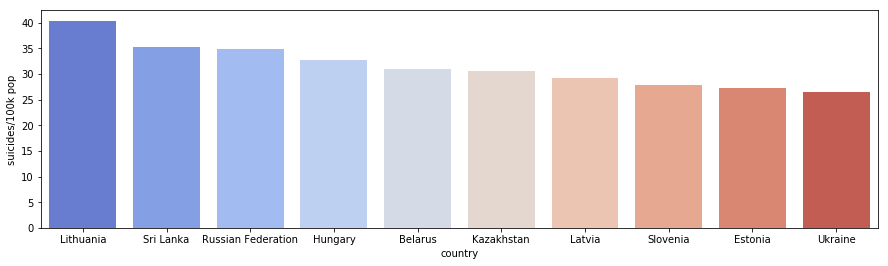

In [19]:
data_suicide_mean = lista['suicides/100k pop'].groupby(lista.country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10),palette='coolwarm')